In [22]:
%load_ext memory_profiler

In [144]:
import os
import cv2
import time
import json
import psutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from pycocotools.coco import COCO as coco

In [2]:
PATH = []
with open('PATH.json','r') as f:
    PATH = json.load(f)
api = coco(annotation_file = os.path.join(PATH['ROOT'], PATH['ValAnn']))
ids = list(api.anns.keys())
anno = {}

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!


In [3]:
def DATA_PATH_LOADING(index):
    anno_dict = api.loadAnns(ids = ids[index])
    if type(anno_dict) == type([]):
        for k in anno_dict[0].keys():
            anno[k] = []
    else:
        for k in anno_dict.keys():
            anno[k] = []
    for i in anno_dict:
        for k ,v in i.items():
            anno[k].append(v)
    img = Image.open(os.path.join(PATH['ROOT'], PATH['ValImg'], api.loadImgs(ids = anno_dict[0]['image_id'])[0]['file_name']))
    img = np.array(img)
    return img, anno

In [165]:
def PLOT(img, anno):
    fig, ax = plt.subplots()
    cmp = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff', '#ff8000', '#80ff00']
    skeleton = [[15,13],[13,11],[16,14],[14,12],[11,12],[5,11],[6,12],[5,6],[5,7],[6,8],[7,9],[8,10],[1,2],[0,1],[0,2],[1,3],[2,4],[3,5],[4,6]]
    ax.imshow(img)
    kypt = anno['keypoints'][0]
    anno_x = []
    anno_y = []
    for k in range(int(len(kypt)/3)):
        anno_x.append(kypt[k*3])
        anno_y.append(kypt[k*3+1])
    ax.scatter(anno_x, anno_y, marker = '.', color = cmp[1])
    for i in skeleton:
        if anno_x[i[0]] != 0 and anno_x[i[1]] != 0 and anno_y[i[0]] != 0 and anno_y[i[1]] != 0:
            x = []
            y = []
            x.append(anno_x[i[0]])
            x.append(anno_x[i[1]])
            y.append(anno_y[i[0]])
            y.append(anno_y[i[1]])
            ax.plot(x, y , linestyle = '-', color = cmp[1])
    bbox = []
    codes = []
    vertices = []
    codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
    bbox.append(anno['bbox'][0][0])
    bbox.append(anno['bbox'][0][1])
    bbox.append(anno['bbox'][0][0] + anno['bbox'][0][2])
    bbox.append(anno['bbox'][0][1] + anno['bbox'][0][3])
    vertices = [(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1]), (0, 0)]
    path = Path(vertices, codes)
    pathpatch = PathPatch(path, facecolor ='none', edgecolor = cmp[1])
    ax.add_patch(pathpatch)
    plt.show()
    return

peak memory: 274.56 MiB, increment: 0.00 MiB
CPU times: user 91.2 ms, sys: 20.6 ms, total: 112 ms
Wall time: 223 ms


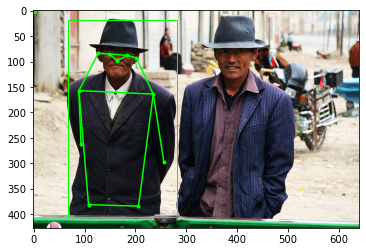

In [169]:
def main():
    %time %memit
    img, anno = DATA_PATH_LOADING(26)
    PLOT(img, anno)
    return anno
anno = main()

In [143]:
print(anno)

{'segmentation': [[[71.78, 402.61, 72.7, 393.41, 76.38, 374.09, 77.3, 366.72, 76.38, 356.6, 75.46, 351.08, 81.9, 339.12, 91.11, 288.5, 89.27, 277.46, 80.98, 248.93, 77.3, 235.13, 75.46, 228.68, 67.18, 193.71, 67.18, 181.75, 67.18, 165.19, 70.86, 144.02, 74.54, 139.42, 123.31, 127.46, 134.36, 121.93, 139.88, 118.25, 139.88, 112.73, 139.88, 104.45, 135.28, 100.77, 130.68, 97.09, 128.84, 92.49, 126.08, 86.96, 124.23, 75.92, 119.63, 73.16, 114.11, 72.24, 113.19, 68.56, 120.55, 65.8, 124.23, 65.8, 127, 62.12, 131.6, 63.96, 145.4, 20.71, 149.08, 17.95, 160.13, 17.95, 182.21, 19.79, 192.33, 21.63, 198.78, 24.39, 204.3, 40.95, 207.98, 75, 210.74, 77.76, 228.22, 79.6, 216.26, 84.2, 208.9, 88.8, 207.06, 98.93, 203.38, 104.45, 198.78, 107.21, 196.02, 111.81, 196.02, 117.33, 224.54, 138.5, 248.47, 151.38, 270.56, 162.43, 278.84, 170.71, 279.76, 175.31, 281.6, 207.52, 278.84, 225, 279.76, 274.7, 274.24, 301.38, 258.59, 327.15, 251.23, 339.12, 251.23, 352.92, 250.31, 360.28, 253.07, 374.09, 252.15, 